## Estimation of a function, with a polynom of choosen order.

The aim is to build this polynom by choosing the best coefficients.
Here, the best is defined by minimizing the Mean Square Error (MSE).

## Context

Let's consider a metal rod in a closed environment, whose extremities are maintained at constant temperature (T1 on left, T2 on right). We let the system evolves to equilibrium. Then, we make $N$ measurement of the temperature $t$ at different points $x$.

We get a collection of temperature $(t_i)_{1<i<n}$ for each points $(x_i)_{1<i<n}$.

Suppose that we don't know any theory that gives information about temperature.
We want to find a function $y$ which links the position $x_i$ to the temperature $t_i$, such that $t_i = y(x_i)$.

We don't know $y$, but we can suppose (as an hypothesis) that $y$ is close enough to $f$, a polynomial of order $Q$: $f(x, \textbf{w}) = \sum_{j=0}^Q w_j x^j$, with $\textbf{w}$ being some weights/coefficients.

What we want is to find the "best $f$", which is equivalent to find the best weights. 
The "best $f$" here is the $f$ that minimize the Mean Square Error (MSE)



## Mean Square Error (MSE)


$\begin{align}
       \textbf{x} &= \begin{bmatrix}
              x_{1} \\
              x_{2} \\
              \vdots \\
              x_{n}
         \end{bmatrix}
\end{align}$ is the input vector (we know it),
$\begin{align}
       \textbf{t} &= \begin{bmatrix}
              t_{1} \\
              t_{2} \\
              \vdots \\
              t_{n}
         \end{bmatrix}
\end{align}$ is the target vector (we know it),

$f(x, \textbf{w}) = \sum_{j=0}^Q w_j x^j$ is the polynomials we are trying to estimate, with 
$\begin{align}
       \textbf{w} &= \begin{bmatrix}
              w_{1} \\
              w_{2} \\
              \vdots \\
              w_{Q}
         \end{bmatrix}
\end{align}$ (we don't know $\textbf{w}$)


The Mean Square Error (MSE) is defined by:

$\begin{align}
       E(\textbf{w}) &= \frac{1}{2} \sum_{i=1}^n [f(x_n, \textbf{w}) - t_n]^2 \\
\end{align}$

Let X be the matrix defined by:
$X = \begin{bmatrix}
       x_1^0 & x_1^1 & x_1^2 & \dots & x_1^Q \\
       x_2^0 & x_2^1 & x_2^2 & \dots & x_2^Q \\
       \vdots & \vdots & \vdots & \ddots &\vdots \\
       x_n^0 & x_n^1 & x_n^2 & \dots & x_n^Q \\
       \end{bmatrix}
$

The MSE can be rewritten as:
$\begin{align}
       E(\textbf{w}) &= \frac{1}{2} (X \textbf{w} - \textbf{t})^T (X \textbf{w} - \textbf{t})\\
\end{align}$

Indeed, 
$\begin{align} 
       X \textbf{w} &= \begin{bmatrix}
                            \sum_{j=0}^Q w_{j} x_1^j \\
                            \vdots \\
                            \sum_{j=0}^Q w_{j} x_n^j
                     \end{bmatrix} 
                     &= \begin{bmatrix}
                            f(x_1, \textbf{w}) \\
                            \vdots \\
                            f(x_n, \textbf{w})
                     \end{bmatrix}
\end{align}$


Minimizing the MSE is equivalent to say that:


$\begin{align}
       \frac{\partial E}{\partial \textbf{w}} = 0
\end{align}$


We can show that:

$\begin{align}
       \frac{\partial E}{\partial \textbf{w}} = \begin{bmatrix}
                            \frac{\partial E}{\partial w_1} \\
                            \vdots \\
                            \frac{\partial E}{\partial w_Q}
                     \end{bmatrix} = X^T (X \textbf{w} - \textbf{t})
\end{align}$


Therefore, if $X^T X$ is inversible, 
$\begin{align}
       \textbf{w} = (X^T X)^{-1} X^T \textbf{t}
\end{align}$

The vector $\textbf{w}$ contains the coefficients of the polynomial function $f$, such that the MSE is minimal.

## Python code


In [1]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def f(Q: int, x_n: np.ndarray, t_n: np.ndarray) -> Callable[[float], float]:
    """Return the polynomial of order Q that minimize the MSE (t_n = f(x_n))

    Args:
        Q (int): order of the polynomial
        x_n (np.ndarray): input vector
        t_n (np.ndarray): target vector

    Returns:
        Callable[[float], float]: a polynomial
    """
    if len(x_n) != len(t_n):
        raise ValueError(
            "Input and target vectors should have the same length")
    n = len(x_n)

    X = np.zeros((n, Q))
    for i in range(n):
        for j in range(Q):
            X[i, j] = np.power(x_n[i], j)

    X_t = np.transpose(X)
    A = X_t.dot(X)
    A_inv = np.linalg.inv(A)
    W = A_inv.dot(X_t).dot(t_n)

    return lambda x: np.sum([w * x**j for (j, w) in enumerate(W)])


In [3]:
# The function y we want to find:
# Sinus of x (with lot of points)
nb_pts_line = 100
X_true = np.linspace(0, 1, num=nb_pts_line)
Y_true = np.sin(2 * np.pi * X_true)

# The data we have from measurement:
# Sinus of x  + some gaussian noise (with less points)
N = int(nb_pts_line / 10)
X_measured = np.linspace(0, 1, num=N)
T_measured = np.sin(2 * np.pi * X_measured) + np.random.normal(0, 0.1, N)


In [4]:
# The order of the polynomial for the approximation
Q = 5
# Polynomial
polynomial_f = f(Q, X_measured, T_measured)


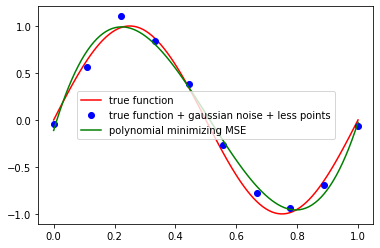

In [5]:
# Graphs

# The true function we are trying to find (y)
plt.plot(X_true, Y_true, "r", label="true function")
# The data we have measured (some gaussian noise because no measurement is perfect)
plt.plot(X_measured, T_measured, "ob",
         label="true function + gaussian noise + less points")

# The polynomial f, which is supposed to be as close to y as possible
plt.plot(X_true, [polynomial_f(x)
         for x in X_true], "g", label="polynomial minimizing MSE")

plt.legend()
plt.show()


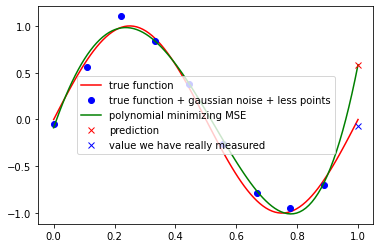

In [6]:
# Prediction

# We can use this polynomial to estimate the next value of a function
# So, we know (x_i) and (t_i) for 1<=i<=n-1, and want to estimate f(x_n)

# Polynomial (notice the "-1")
polynomial_f = f(Q, X_measured[:-1], T_measured[:-1])
prediction_last_value = polynomial_f(X_measured[-1])
true_value = T_measured[-1]


# The true function we are trying to find (y)
plt.plot(X_true, Y_true, "r", label="true function")
# The data we have measured
plt.plot(X_measured[:-1], T_measured[:-1], "ob",
         label="true function + gaussian noise + less points")

# The polynomial f, which is supposed to be as close to y as possible
plt.plot(X_true, [polynomial_f(x)
         for x in X_true], "g", label="polynomial minimizing MSE")


plt.plot(X_measured[-1], prediction_last_value, "xr", label="prediction")
plt.plot(X_measured[-1], true_value, "xb",
         label="value we have really measured")

plt.legend()
plt.show()
